In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive')

In [5]:
data=pd.read_csv('weatherHistory.csv')
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [6]:
data.info

<bound method DataFrame.info of                       Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting 

In [7]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
data['Formatted Date'].head(5)

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [10]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc=True)

In [11]:
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [12]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [13]:
data = data.set_index("Formatted Date")
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


In [14]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[data_columns].resample('MS').mean()
df_monthly_mean.tail()

,Apparent Temperature (C),Humidity
Formatted Date,,
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906
2016-11-01 00:00:00+00:00,3.048627,0.848472
2016-12-01 00:00:00+00:00,-2.017272,0.887981


Text(0.5, 1.0, 'Variation in Apparent Temperature and Humidity with time')

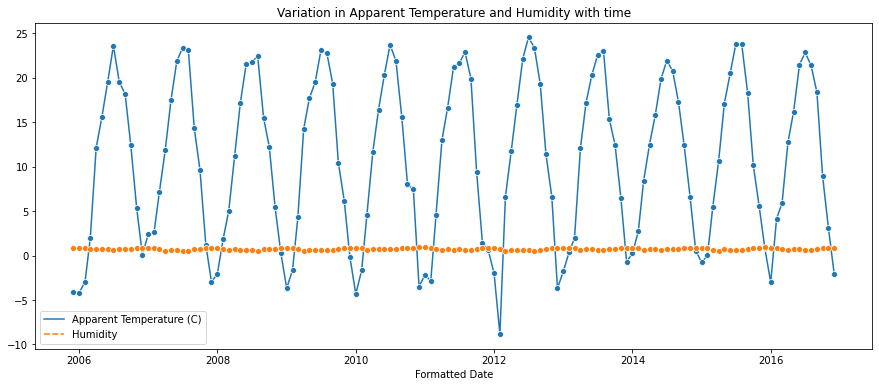

In [18]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_monthly_mean, marker="o")
plt.title("Variation in Apparent Temperature and Humidity with time")

In [19]:
data1 = df_monthly_mean[df_monthly_mean.index.month==1]
print(data1)
data1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-01-01 00:00:00+00:00                 -4.173708  0.834610
2007-01-01 00:00:00+00:00                  2.387015  0.813495
2008-01-01 00:00:00+00:00                 -2.069907  0.819476
2009-01-01 00:00:00+00:00                 -3.669937  0.867621
2010-01-01 00:00:00+00:00                 -4.329062  0.875914
2011-01-01 00:00:00+00:00                 -2.186813  0.922030
2012-01-01 00:00:00+00:00                 -1.965211  0.797581
2013-01-01 00:00:00+00:00                 -1.768578  0.883105
2014-01-01 00:00:00+00:00                  0.234536  0.846169
2015-01-01 00:00:00+00:00                 -0.770124  0.831519
2016-01-01 00:00:00+00:00                 -3.014576  0.866156


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'MOnth of January')

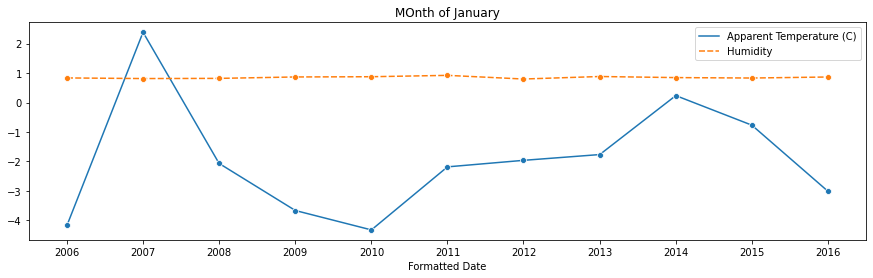

In [20]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data1,marker="o")
plt.title("Month of January")

In [21]:
data2 = df_monthly_mean[df_monthly_mean.index.month==2]
print(data2)
data2.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-02-01 00:00:00+00:00                 -2.990716  0.843467
2007-02-01 00:00:00+00:00                  2.639848  0.815015
2008-02-01 00:00:00+00:00                  1.915597  0.682615
2009-02-01 00:00:00+00:00                 -1.641237  0.821161
2010-02-01 00:00:00+00:00                 -1.662045  0.851682
2011-02-01 00:00:00+00:00                 -2.849471  0.854137
2012-02-01 00:00:00+00:00                 -8.817241  0.762859
2013-02-01 00:00:00+00:00                  0.418171  0.869345
2014-02-01 00:00:00+00:00                  2.742998  0.812530
2015-02-01 00:00:00+00:00                  0.017006  0.803452
2016-02-01 00:00:00+00:00                  4.150782  0.836853


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of February')

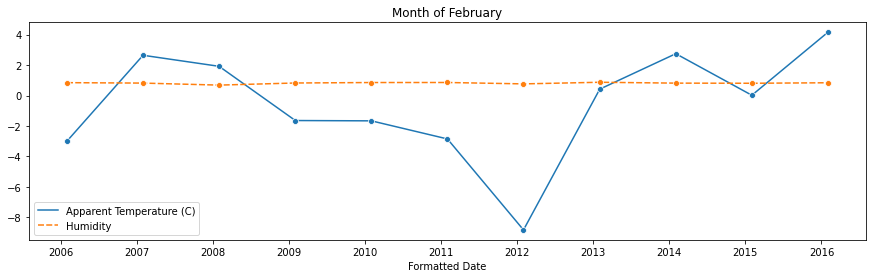

In [22]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data2,marker="o")
plt.title("Month of February")

In [23]:
data3 = df_monthly_mean[df_monthly_mean.index.month==3]
print(data3)
data3.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-03-01 00:00:00+00:00                  1.969780  0.778737
2007-03-01 00:00:00+00:00                  7.174619  0.713884
2008-03-01 00:00:00+00:00                  5.004353  0.668468
2009-03-01 00:00:00+00:00                  4.280585  0.696680
2010-03-01 00:00:00+00:00                  4.589038  0.670161
2011-03-01 00:00:00+00:00                  4.589785  0.782970
2012-03-01 00:00:00+00:00                  6.591502  0.535941
2013-03-01 00:00:00+00:00                  1.957445  0.809946
2014-03-01 00:00:00+00:00                  8.408303  0.640403
2015-03-01 00:00:00+00:00                  5.441592  0.669476
2016-03-01 00:00:00+00:00                  5.901404  0.764677


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of March')

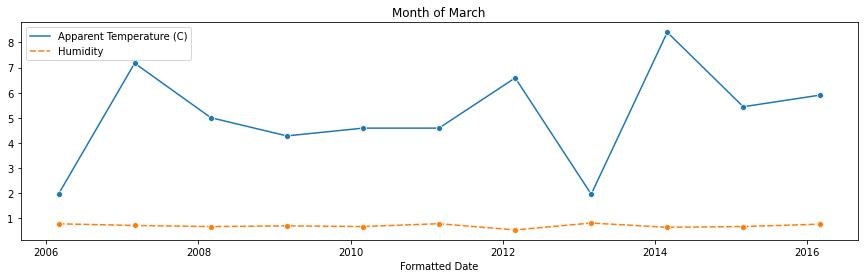

In [24]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data3,marker="o")
plt.title("Month of March")

In [25]:
data4 = df_monthly_mean[df_monthly_mean.index.month==4]
print(data4)
data4.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of April')

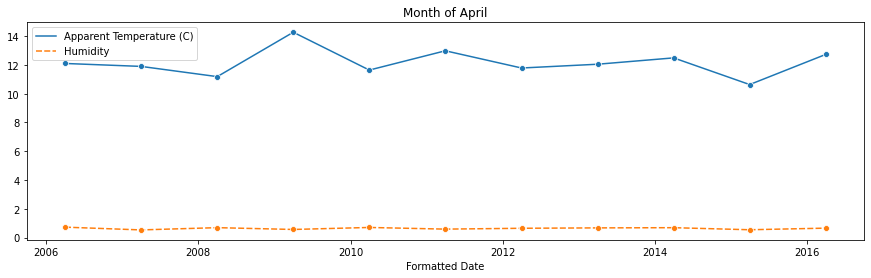

In [26]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data4,marker="o")
plt.title("Month of April")

In [27]:
data5 = df_monthly_mean[df_monthly_mean.index.month==5]
print(data5)
data5.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-05-01 00:00:00+00:00                 15.539479  0.721801
2007-05-01 00:00:00+00:00                 17.453136  0.653253
2008-05-01 00:00:00+00:00                 17.113583  0.663132
2009-05-01 00:00:00+00:00                 17.691256  0.597151
2010-05-01 00:00:00+00:00                 16.409879  0.773091
2011-05-01 00:00:00+00:00                 16.644922  0.688038
2012-05-01 00:00:00+00:00                 16.985596  0.672863
2013-05-01 00:00:00+00:00                 17.208976  0.735309
2014-05-01 00:00:00+00:00                 15.752218  0.698602
2015-05-01 00:00:00+00:00                 17.067660  0.702742
2016-05-01 00:00:00+00:00                 16.199216  0.702164


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of May')

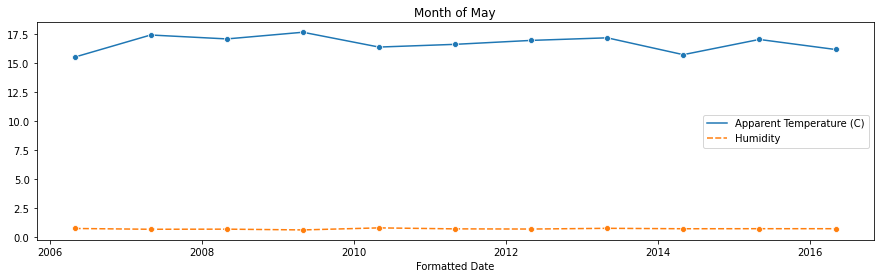

In [28]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data5,marker="o")
plt.title("Month of May")

In [29]:
data6 = df_monthly_mean[df_monthly_mean.index.month==6]
print(data6)
data6.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-06-01 00:00:00+00:00                 19.535965  0.747125
2007-06-01 00:00:00+00:00                 21.883102  0.616486
2008-06-01 00:00:00+00:00                 21.513750  0.679861
2009-06-01 00:00:00+00:00                 19.526790  0.675944
2010-06-01 00:00:00+00:00                 20.340571  0.778347
2011-06-01 00:00:00+00:00                 21.157114  0.677611
2012-06-01 00:00:00+00:00                 22.157130  0.622306
2013-06-01 00:00:00+00:00                 20.345664  0.761847
2014-06-01 00:00:00+00:00                 19.874306  0.602403
2015-06-01 00:00:00+00:00                 20.511782  0.655208
2016-06-01 00:00:00+00:00                 21.463387  0.733458


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of June')

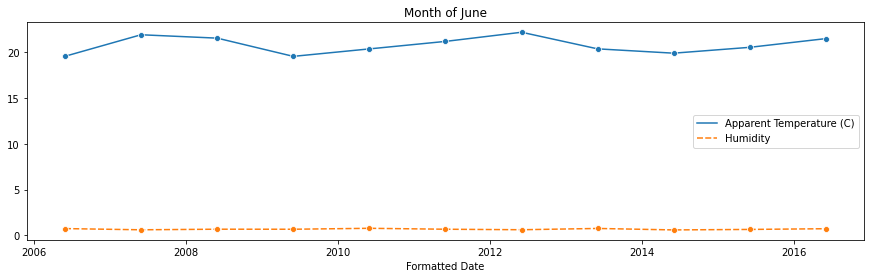

In [30]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data6,marker="o")
plt.title("Month of June")

In [31]:
data7 = df_monthly_mean[df_monthly_mean.index.month==7]
print(data7)
data7.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-07-01 00:00:00+00:00                 23.595348  0.656304
2007-07-01 00:00:00+00:00                 23.348081  0.491250
2008-07-01 00:00:00+00:00                 21.765562  0.616022
2009-07-01 00:00:00+00:00                 23.091614  0.600215
2010-07-01 00:00:00+00:00                 23.699447  0.755323
2011-07-01 00:00:00+00:00                 21.634984  0.707500
2012-07-01 00:00:00+00:00                 24.525343  0.580860
2013-07-01 00:00:00+00:00                 22.533669  0.636586
2014-07-01 00:00:00+00:00                 21.911598  0.699393
2015-07-01 00:00:00+00:00                 23.803487  0.622984
2016-07-01 00:00:00+00:00                 22.840226  0.669328


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of July')

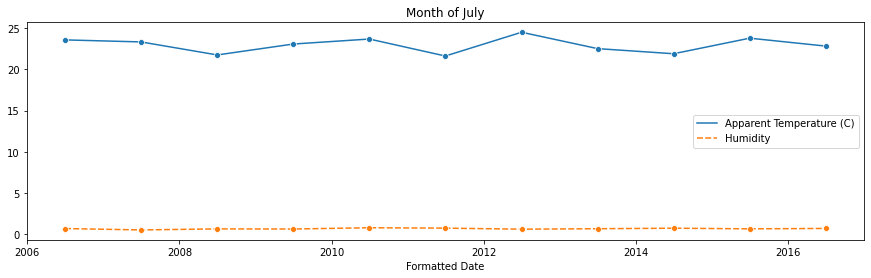

In [32]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data7,marker="o")
plt.title("Month of July")

In [33]:
data8 = df_monthly_mean[df_monthly_mean.index.month==8]
print(data8)
data8.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-08-01 00:00:00+00:00                 19.528241  0.760753
2007-08-01 00:00:00+00:00                 23.079689  0.562876
2008-08-01 00:00:00+00:00                 22.438852  0.551895
2009-08-01 00:00:00+00:00                 22.794205  0.597231
2010-08-01 00:00:00+00:00                 21.906713  0.742786
2011-08-01 00:00:00+00:00                 22.874126  0.631263
2012-08-01 00:00:00+00:00                 23.384334  0.500081
2013-08-01 00:00:00+00:00                 23.005249  0.596263
2014-08-01 00:00:00+00:00                 20.781870  0.707809
2015-08-01 00:00:00+00:00                 23.745766  0.659825
2016-08-01 00:00:00+00:00                 21.383094  0.674046


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of August')

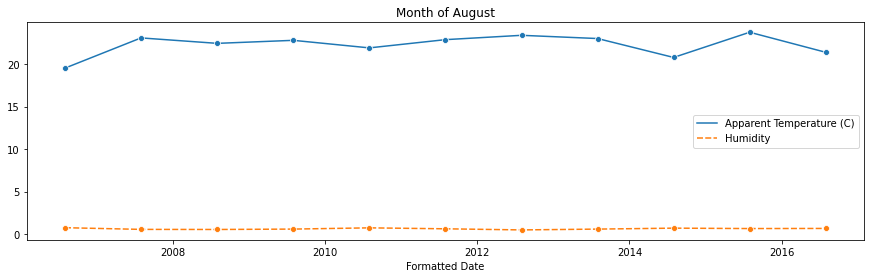

In [34]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data8,marker="o")
plt.title("Month of August")

In [35]:
data9 = df_monthly_mean[df_monthly_mean.index.month==9]
print(data9)
data9.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-09-01 00:00:00+00:00                 18.155571  0.689444
2007-09-01 00:00:00+00:00                 14.328457  0.682708
2008-09-01 00:00:00+00:00                 15.489606  0.690722
2009-09-01 00:00:00+00:00                 19.322353  0.596764
2010-09-01 00:00:00+00:00                 15.549414  0.826806
2011-09-01 00:00:00+00:00                 19.899900  0.611375
2012-09-01 00:00:00+00:00                 19.302948  0.603319
2013-09-01 00:00:00+00:00                 15.317477  0.691986
2014-09-01 00:00:00+00:00                 17.258387  0.785944
2015-09-01 00:00:00+00:00                 18.308472  0.712889
2016-09-01 00:00:00+00:00                 18.355833  0.688833


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of September')

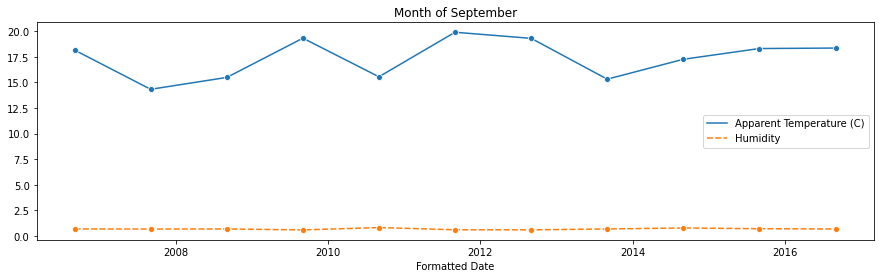

In [38]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data9,marker="o")
plt.title("Month of September")

In [36]:
data10 = df_monthly_mean[df_monthly_mean.index.month==10]
print(data10)
data10.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-10-01 00:00:00+00:00                 12.398678  0.733642
2007-10-01 00:00:00+00:00                  9.662612  0.740954
2008-10-01 00:00:00+00:00                 12.253390  0.753911
2009-10-01 00:00:00+00:00                 10.433535  0.763468
2010-10-01 00:00:00+00:00                  8.017145  0.815538
2011-10-01 00:00:00+00:00                  9.405167  0.701747
2012-10-01 00:00:00+00:00                 11.435581  0.794315
2013-10-01 00:00:00+00:00                 12.449134  0.748750
2014-10-01 00:00:00+00:00                 12.381803  0.826116
2015-10-01 00:00:00+00:00                 10.170408  0.840524
2016-10-01 00:00:00+00:00                  8.923947  0.799906


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of October')

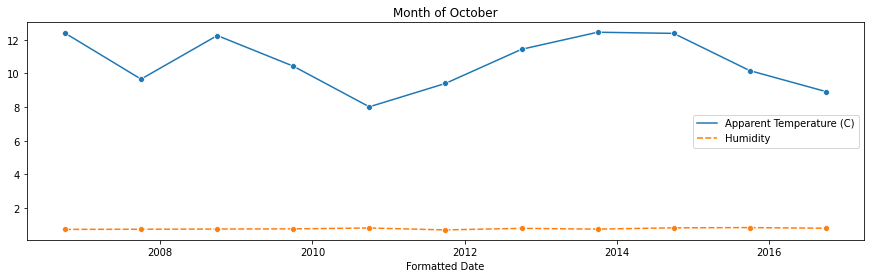

In [39]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data10,marker="o")
plt.title("Month of October")

In [40]:
data11 = df_monthly_mean[df_monthly_mean.index.month==11]
print(data11)
data11.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-11-01 00:00:00+00:00                  5.328310  0.812722
2007-11-01 00:00:00+00:00                  1.218225  0.801444
2008-11-01 00:00:00+00:00                  5.415039  0.766972
2009-11-01 00:00:00+00:00                  6.177222  0.865292
2010-11-01 00:00:00+00:00                  7.440934  0.858722
2011-11-01 00:00:00+00:00                  1.368519  0.800528
2012-11-01 00:00:00+00:00                  6.608133  0.871389
2013-11-01 00:00:00+00:00                  6.425664  0.824792
2014-11-01 00:00:00+00:00                  6.639097  0.839736
2015-11-01 00:00:00+00:00                  5.553040  0.817014
2016-11-01 00:00:00+00:00                  3.048627  0.848472


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of November')

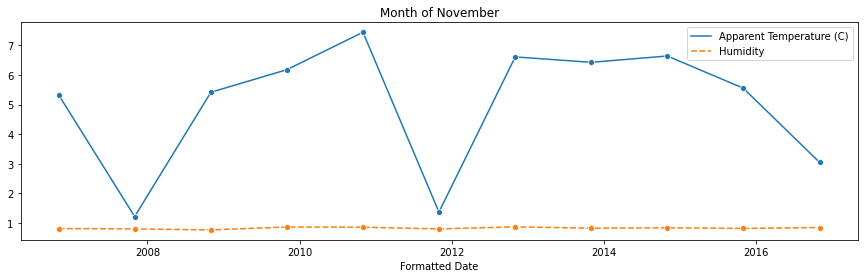

In [41]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data11,marker="o")
plt.title("Month of November")

In [42]:
data12 = df_monthly_mean[df_monthly_mean.index.month==12]
print(data12)
data12.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-01 00:00:00+00:00                 -4.050000  0.890000
2006-12-01 00:00:00+00:00                  0.107310  0.905376
2007-12-01 00:00:00+00:00                 -2.964897  0.856250
2008-12-01 00:00:00+00:00                  0.327389  0.828226
2009-12-01 00:00:00+00:00                 -0.169086  0.844637
2010-12-01 00:00:00+00:00                 -3.485947  0.913602
2011-12-01 00:00:00+00:00                  0.618093  0.866223
2012-12-01 00:00:00+00:00                 -3.672909  0.886801
2013-12-01 00:00:00+00:00                 -0.690054  0.823965
2014-12-01 00:00:00+00:00                  0.556586  0.835927
2015-12-01 00:00:00+00:00                  0.828644  0.925390
2016-12-01 00:00:00+00:00                 -2.017272  0.887981


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 1.0, 'Month of December')

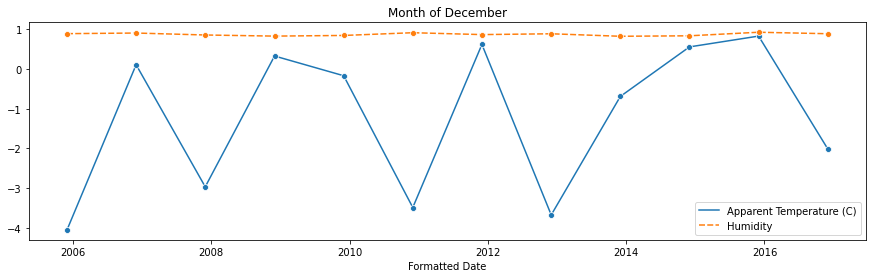

In [43]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data12,marker="o")
plt.title("Month of December")

In [44]:
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    data = data[data.index.month == month]
    sns.lineplot(data=data,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

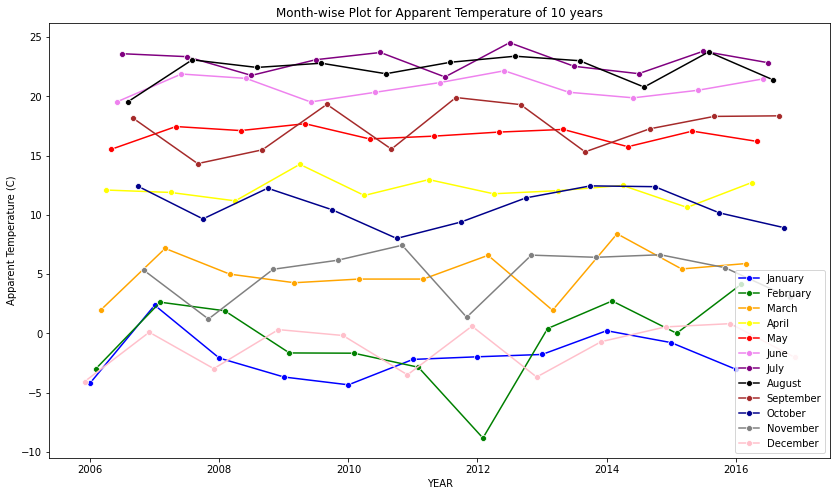

In [45]:
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

In [47]:
print('''CONCLUSION
As we can see in the above figures Apparent temperature for every month for every year with repect to Humidity varying a lot sometime it is at peak and sometime fall down. Humidity is as constant as compaire to Apparent Temperature varies over month over years
''')

CONCLUSION
As we can see in the above figures Apparent temperature for every month for every year with repect to Humidity varying a lot sometime it is at peak and sometime fall down. Humidity is as constant as compaire to Apparent Temperature varies over month over years

